# **EXAMEN FINAL DE SIS420**

## Nombre: Yavo Chavez Abigail Zulma
## C.U. 35-5335
## Carrera: Ing. Ing. En Diseño y Animación Digital


# Implementación del modelo Aprendizaje No Supervisado

En este ejercicio implementaremos el modelo con el Dataset.

Nuestro objetuvo aplicar el modelo de aprendizaje no supervisado con datos de dataset




## **Información del Dataset**:


### Acerca del conjunto de datos


## **1. Procesamiento de los Datos**

In [1]:
# Plotting library
from matplotlib import pyplot
# se utiliza para el manejo de rutas y directorios.
import os
# Calculo cientifico y vectorial para python
import numpy as np
# Librerias para graficar
import matplotlib.pyplot as plt
import pandas as pd
# Modulo de optimización de scipy
from scipy import optimize
#Para separa el Dataset 20% y 80% para diferentes pruebas
from sklearn.model_selection import train_test_split

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import joblib

In [2]:
# Configurar Pandas para que no corte la visualización
pd.set_option('display.max_rows', 50)  # Mostrar todas las filas (60 -> None)
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas (20 -> None)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import chardet

file_path = '/content/drive/MyDrive/Dataset Machine learning/dataset_16.csv'

# Leer una muestra del archivo
with open(file_path, 'rb') as f:
    rawdata = f.read(10000)

# Detectar el encoding
result = chardet.detect(rawdata)
encoding = result['encoding']

print(f'Encoding detectado: {encoding}')

In [ ]:
# Obtenemos los datos
data = pd.read_csv('/content/drive/MyDrive/Dataset Machine learning/dataset_16.csv', delimiter=',')
data

In [ ]:
import chardet

# Detectar la codificación del archivo
with open('/content/drive/MyDrive/Dataset Machine learning/dataset_16.csv', 'rb') as file:
    raw_data = file.read()
    result = chardet.detect(raw_data)
    encoding = result['encoding']

# Leer el archivo con la codificación detectada
with open('/content/drive/MyDrive/Dataset Machine learning/dataset_16.csv', 'r', encoding=encoding) as file:
    content = file.read()
    print(content)


In [ ]:
#Descartamos las columnas que tienen muchos datos perdidos o que no son muy necesarios para el analisis
# data.drop(['phishing'], axis=1, inplace=True)

In [ ]:
# Información del dataset
print(data.info())

# Descripción estadística
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 3072 entries, 0 to 3071
dtypes: float64(3072)
memory usage: 1.1 GB
None
                 0             1            2            3             4  \
count  50000.00000  50000.000000  50000.00000  50000.00000  50000.000000   
mean       0.00112      0.001160      0.00262      0.00112      0.001160   
std        0.25044      0.259384      0.58585      0.25044      0.259384   
min        0.00000      0.000000      0.00000      0.00000      0.000000   
25%        0.00000      0.000000      0.00000      0.00000      0.000000   
50%        0.00000      0.000000      0.00000      0.00000      0.000000   
75%        0.00000      0.000000      0.00000      0.00000      0.000000   
max       56.00000     58.000000    131.00000     56.00000     58.000000   

                 5            6             7            8            9  \
count  50000.00000  50000.00000  50000.000000  50000.00000  50000.00000   
mean    

In [ ]:
# Comprobar si hay valores faltantes
print(data.isnull().sum())

# Eliminar filas con valores faltantes (si las hay)
data.dropna(inplace=True)

print(data.shape)

0       0
1       0
2       0
3       0
4       0
       ..
3067    0
3068    0
3069    0
3070    0
3071    0
Length: 3072, dtype: int64
(50000, 3072)


In [ ]:
# Muestreo aleatorio sin reemplazo
# df = data.sample(n=25000, random_state=42)
df = data.iloc[:25000]

### **Normalización de los datos de Entrenamiento y Prueba**

In [ ]:
# # Crear una instancia de StandardScaler
# scaler = StandardScaler()

# # Ajustar y transformar los datos
# scaled_data = scaler.fit_transform(data)

# # Convertir los datos escalados de vuelta a un DataFrame
# df = pd.DataFrame(scaled_data, columns=data.columns)

# # Mostrar el DataFrame escalado
# df




In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
#? X_train_, X_test_ = train_test_split(data, test_size=0.2, random_state=42)


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train = data.iloc[:40000]
X_test = data.iloc[40000:50000]


# Mostrar los datos escalados y divididos
# Mostramos la cantidad de ejemplos que se utilizaran para el entrenamiento
print('=' * 100)
print("Cantidad de ejemplos del 80% para el entrenamiento es de: {:.0f}".format(len(X_train)))
print("Cantidad de ejemplos del 20% para la prueba es de: {:.0f}".format(len(X_test)))

Cantidad de ejemplos del 80% para el entrenamiento es de: 40000
Cantidad de ejemplos del 20% para la prueba es de: 10000


In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
# X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)

# # Mostrar los datos escalados y divididos
# # Mostramos la cantidad de ejemplos que se utilizaran para el entrenamiento
# print('=' * 100)
# print("Cantidad de ejemplos del 80% para el entrenamiento es de: {:.0f}".format(len(X_train)))
# print("Cantidad de ejemplos del 20% para la prueba es de: {:.0f}".format(len(X_test)))

Cantidad de ejemplos del 80% para el entrenamiento es de: 40000
Cantidad de ejemplos del 20% para la prueba es de: 10000


In [ ]:
X_train

0     1      2     3     4      5     6     7      8     9    10  \
0      56.0  58.0  131.0  56.0  58.0  131.0  56.0  58.0  131.0  56.0  58.0   
1       0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0   
2       0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0   
3       0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0   
4       0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0   
...     ...   ...    ...   ...   ...    ...   ...   ...    ...   ...   ...   
39995   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0   
39996   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0   
39997   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0   
39998   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0   
39999   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0   

          11    12    13     14     15     16     17     18     19     20  \
0      131.0  56.0  58.0  131.0  255.0  255.0  255.0  255.0  255.0  255.0   
1        0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2        0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3        0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4        0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...   ...   ...    ...    ...    ...    ...    ...    ...    ...   
39995    0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
39996    0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
39997    0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
39998    0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
39999    0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

          21     22     23     24     25     26     27     28     29     30  \
0      255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
1        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
39995    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
39996    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
39997    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
39998    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
39999    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

          31     32     33     34     35     36     37     38     39     40  \
0      255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
1        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
39995    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
39996    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
39997    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
39998    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
39999    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

          41     42     43     44     45     46     47     48     49     50  \
0      255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
1        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2        0.0 

In [ ]:
# Normalizar las imágenes de entrenamiento y prueba
X_train_ = X_train / 255.0
X_test_ = X_test / 255.0

# Mostramos los datos
X_train_

0         1         2         3         4         5         6  \
0      0.219608  0.227451  0.513725  0.219608  0.227451  0.513725  0.219608   
1      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
39995  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
39996  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
39997  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
39998  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
39999  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

              7         8         9        10        11        12        13  \
0      0.227451  0.513725  0.219608  0.227451  0.513725  0.219608  0.227451   
1      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
39995  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
39996  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
39997  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
39998  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
39999  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

             14   15   16   17   18   19   20   21   22   23   24   25   26  \
0      0.513725  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
1      0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2      0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3      0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4      0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
39995  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
39996  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
39997  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
39998  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
39999  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

        27   28   29   30   31   32   33   34   35   36   37   38   39   40  \
0      1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
39995  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
39996  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
39997  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
39998  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
39999  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

        41   42   43   44   45   46   47   48   49   50   51   52   53   54  \
0      1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

# **ML - Aprendizaje No Supervisado**

## **1. Selección del Modelo y Evaluación del Número de Clusters**

### 4.2 Encontrando el valor óptimo de clusters (K) - MÉTODO DE COEFICIENTE DE SILUETA

c:\Users\gonza\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\gonza\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\gonza\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\gonza\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly du

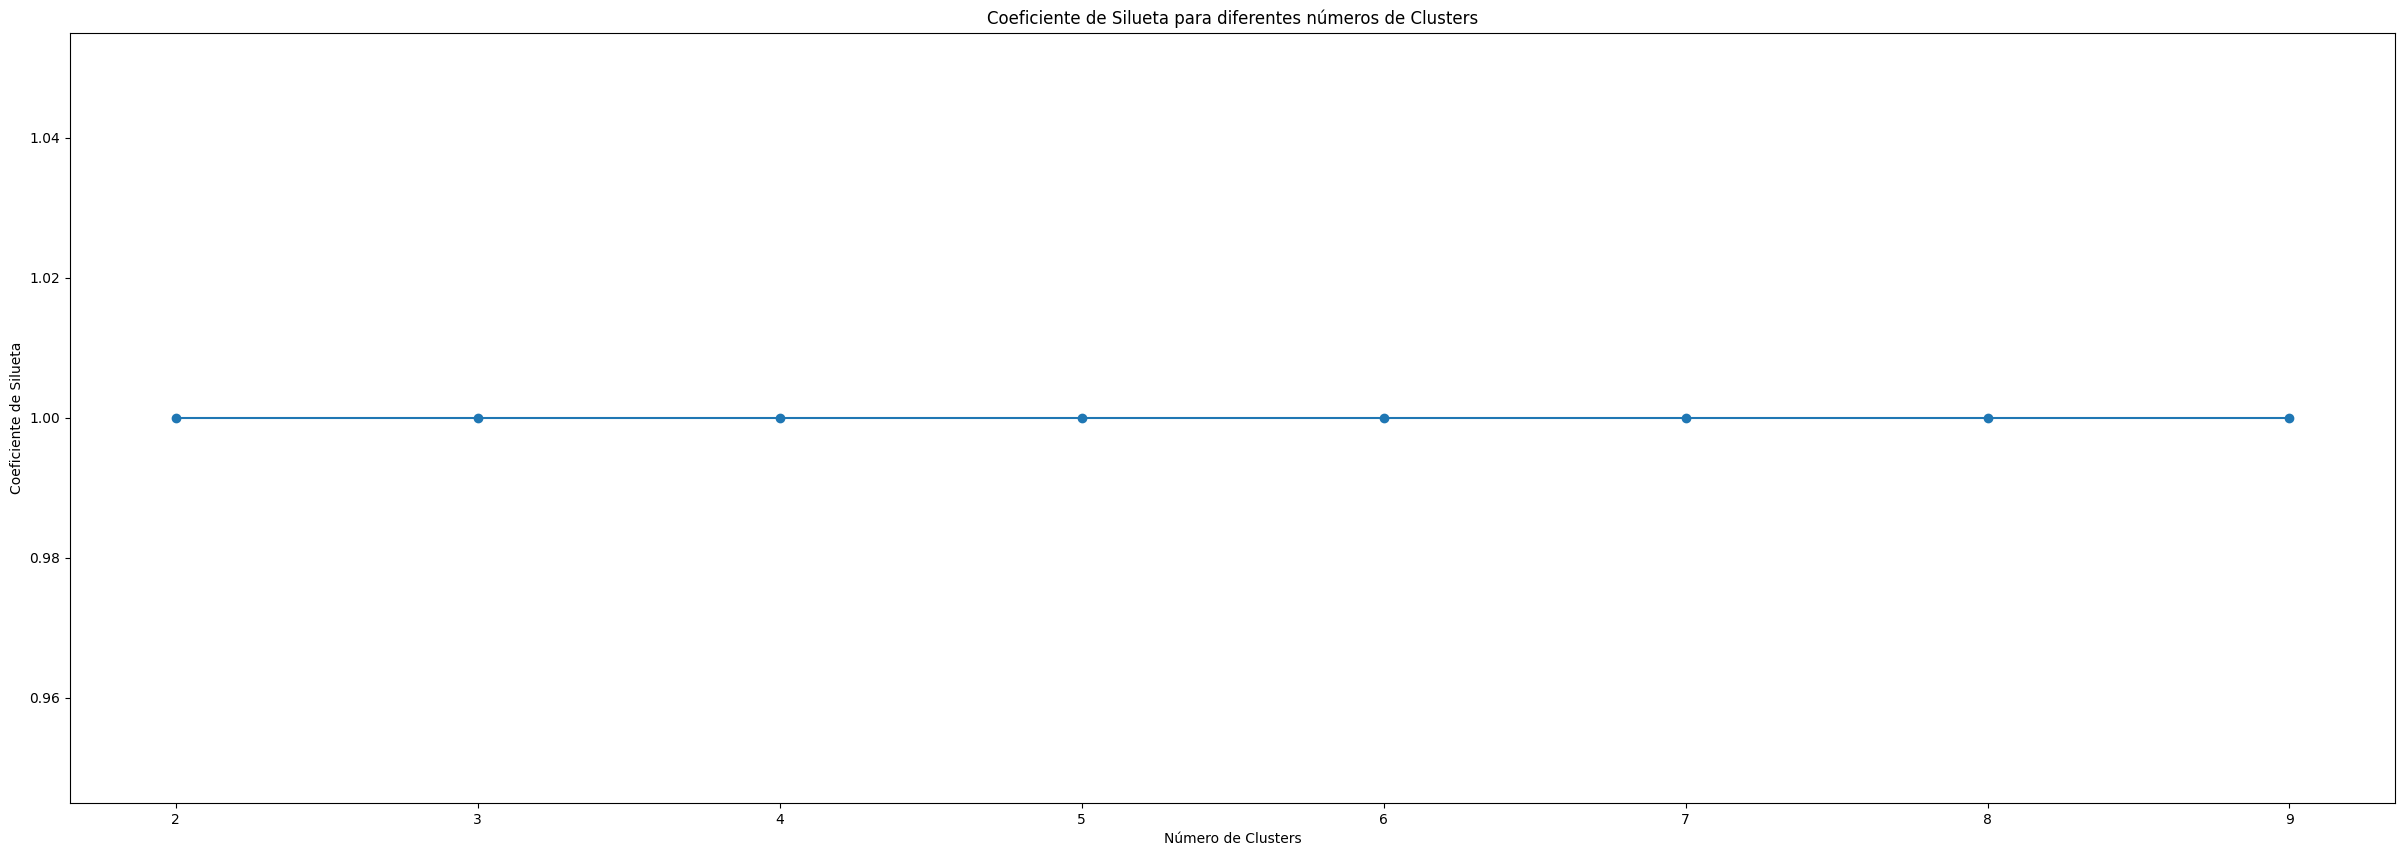

In [ ]:
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_train_)
    score = silhouette_score(X_train_, labels)
    silhouette_scores.append(score)

# Graficar el coeficiente de silueta
plt.figure(figsize=(30, 10))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silueta')
plt.title('Coeficiente de Silueta para diferentes números de Clusters')
plt.show()


evalúa y visualiza qué número de clusters es el más apropiado para los datos dados, utilizando el coeficiente de silueta como métrica de calidad.

In [ ]:
# Encontrar el índice del máximo coeficiente de silueta
max_index = np.argmax(silhouette_scores)

# Calcular el valor de k correspondiente al máximo coeficiente de silueta
mejor_K = max_index + 2

# Imprimir el valor de k que maximiza el coeficiente de silueta
print("El valor óptimo de k es:", mejor_K)

El valor óptimo de k es: 2


## **2. Aplicar K-Means con el Número de Clusters Elegido**

In [ ]:
from sklearn.cluster import KMeans

k = 2  # Números de clusters

# Instanciamos el modelo KMeans con el número de clusters k
kmeans = KMeans(n_clusters=k, random_state=42)

# Ajustar el modelo KMeans a los datos y transformar los datos en distancias de cada punto a los centroides de los clusters
X_digits_dist = kmeans.fit_transform(X_train_)

In [ ]:
# Mostramos el número de ejemplos en cada grupo
print(X_digits_dist.shape)
# Mostramos las distancias de cada muestra a los centroides de los k clusters
print(X_digits_dist)

(40000, 2)
[[5.51634175e+01 0.00000000e+00]
 [1.06915260e-16 5.51634175e+01]
 [1.06915260e-16 5.51634175e+01]
 ...
 [1.06915260e-16 5.51634175e+01]
 [1.06915260e-16 5.51634175e+01]
 [1.06915260e-16 5.51634175e+01]]


In [ ]:
# Encontrar el índice del punto más cercano a cada centroide (cluster)
idxs = np.argmin(X_digits_dist, axis=0)

# Seleccionar los puntos representativos (centroides) de cada cluster
X_representative_digits = X_train.values[idxs]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


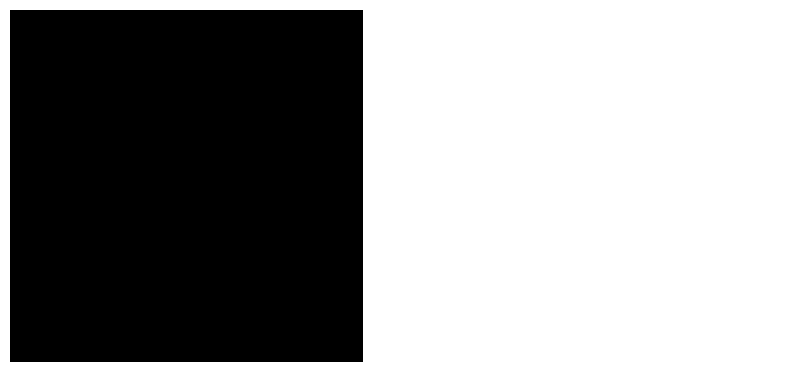

In [ ]:
import matplotlib.pyplot as plt

# Asegúrate de que X_representative_digits sea un array de tamaño (n_samples, 3072)
plt.figure(figsize=(10, 10))

# Determinar el número máximo de subplots a mostrar (máximo 2 en una cuadrícula de 1x2)
max_subplots = min(len(X_representative_digits), 2)

for index in range(max_subplots):
    plt.subplot(1, 2, index + 1)

    # Mostrar la imagen del dígito representativo correspondiente al índice actual
    plt.imshow(X_representative_digits[index].reshape(32, 32, 3), cmap="binary")
    plt.axis('off')

plt.show()


====================================================================================================================================

In [ ]:
# Declaramos el valor de k óptimo
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)

y_pred = kmeans.fit_predict(X_train_)

In [ ]:
# Mostramos el número de ejemplos en cada grupo
print(y_pred.shape)
# Mostramos las distancias de cada muestra a los centroides de los k clusters
print(y_pred)

(40000,)
[1 0 0 ... 0 0 0]


In [ ]:
# Calculamos las localizaciones de cada uno de centroides de cada clustering
# Accedemos a los centroides finales de los clusters identificados por KMeans
centroids = kmeans.cluster_centers_

print(centroids.shape)
print(centroids)

(2, 3072)
[[-2.04981973e-19 -3.68459332e-19  1.15874107e-18 ...  1.93801138e-18
   1.93801138e-18  1.93801138e-18]
 [ 2.19607843e-01  2.27450980e-01  5.13725490e-01 ...  1.00000000e+00
   1.00000000e+00  1.00000000e+00]]


In [ ]:
# Añadir las etiquetas de los clusters al DataFrame original
X_train_df = X_train.copy()
X_train_df['Y-Cluster'] = y_pred

# Mostrar las etiquetas producidas
X_train_df["Y-Cluster"].value_counts()

Y-Cluster
0    39999
1        1
Name: count, dtype: int64

In [ ]:
# Mostramos el dataframe con la nueva columna de cluster
X_train_df

0     1      2     3     4      5     6     7      8     9    10  \
0      56.0  58.0  131.0  56.0  58.0  131.0  56.0  58.0  131.0  56.0  58.0   
1       0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0   
2       0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0   
3       0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0   
4       0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0   
...     ...   ...    ...   ...   ...    ...   ...   ...    ...   ...   ...   
39995   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0   
39996   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0   
39997   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0   
39998   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0   
39999   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0   

          11    12    13     14     15     16     17     18     19     20  \
0      131.0  56.0  58.0  131.0  255.0  255.0  255.0  255.0  255.0  255.0   
1        0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2        0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3        0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4        0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...   ...   ...    ...    ...    ...    ...    ...    ...    ...   
39995    0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
39996    0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
39997    0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
39998    0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
39999    0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

          21     22     23     24     25     26     27     28     29     30  \
0      255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
1        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
39995    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
39996    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
39997    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
39998    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
39999    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

          31     32     33     34     35     36     37     38     39     40  \
0      255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
1        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
39995    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
39996    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
39997    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
39998    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
39999    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

          41     42     43     44     45     46     47     48     49     50  \
0      255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
1        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2        0.0 

In [ ]:
# Guardamos una copia del dataset preparado
X_train_df.to_csv('../Examen Final/data_3_modif.csv', index=False)

## Evaluamos el Modelo

In [ ]:
# Evaluar el modelo
silhouette_avg = silhouette_score(X_train_, y_pred)
print(f'Coeficiente de Silueta: {silhouette_avg}')

Coeficiente de Silueta: 0.999975


## Realizamos algunas pruebas con nuevo datos

## Haciendo la Prueba con X_test condatos de prueba

In [ ]:
## Haciendo la Prueba con X_test condatos de prueba
y_pred_test = kmeans.predict(X_test_)

# Imprimir las etiquetas de clusters predichas para las nuevas muestras
print("Etiquetas de clusters predichos para cada muestra de X_new:")
print(y_pred_test)
print(y_pred_test.shape)

Etiquetas de clusters predichos para cada muestra de X_new:
[0 0 0 ... 0 0 0]
(10000,)


In [ ]:
# Mostramos que cluster se asigno a cada muestra
valores_unicos, conteos = np.unique(y_pred_test, return_counts=True)

# Mostrar resultados
for valor, conteo in zip(valores_unicos, conteos):
    print(f'Y-Clusters: {valor} {conteo} veces')

Y-Clusters: 0 10000 veces


## 5. Conclusiones

## Resultados:

En este ejercicio se obtuvieron los siguientes resultados:

Se pudo realizar el modelo de aprendizaje no supervisado con el dataset asignado, sobre cual trabajamos. Los primero fue estandarizar los datos para que los datos esten en una distribución uniforme, esto se aplica porque es una buena práctica en estos modelos, luego se realizo el PCA para reducir la dimensionalidad de los datos.

Después aplciamos el método de silueta para obtener un valor óptimo de k clusters, en este caso se obtuvo un valor de k = 2, luego se generó el modelo con k clusters, se obtuvo un valor de 0.4534, este valor es el score de silueta, este valor se obtiene al comparar los datos con el modelo generado. Tabién aplicamos el método del codo por lo que no varia mucho su valor, en este caso se obtuvo un valor de 0.4535.

Ya con los números de clusters definidos pudimos aplicar el modelo de aprendizaje no supervizado, realizando el algoritmo de Mkameans para obtener los centroides de los clusters.

Por concluido pudimos entrenar el modelo y calcular 2 etiquetas asignados a cada clusters.